## Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fontTools.misc.filenames import reservedFileNames
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import os

from streamlit import columns

## Llamado de Clases

In [2]:
from src.PipelineProcesamiento import PipelineProcesamiento
from src.utils.metrics import obtener_ruta_app
from src.MetodosEDARNN import MetodosEDARNN

#### Definición de variable

In [12]:
ejecutar = PipelineProcesamiento(os.path.join(obtener_ruta_app("Template-AgroIA"), "data/raw/rnn/ESTIM_papa_2005-2025.xls"),os.path.join(obtener_ruta_app("Template-AgroIA"), "data/raw/rnn/DatosAtmosfericos"))

df= ejecutar.ejecutar_pipeline_completo()
df.head()

2025-07-17 00:22:18,727 - src.PipelineProcesamiento - INFO - Pipeline inicializado correctamente
2025-07-17 00:22:18,728 - src.PipelineProcesamiento - INFO - === INICIANDO PIPELINE COMPLETO ===
2025-07-17 00:22:18,730 - src.PipelineProcesamiento - INFO - Validación de archivos de entrada completada
2025-07-17 00:22:18,731 - src.PipelineProcesamiento - INFO - Iniciando procesamiento de datos de papa
2025-07-17 00:22:18,768 - src.ProcesadorDatosPapa - INFO - Procesando 21 hojas del archivo Excel
2025-07-17 00:22:19,524 - src.ProcesadorDatosPapa - INFO - Procesamiento completado: 1260 registros
2025-07-17 00:22:19,526 - src.PipelineProcesamiento - INFO - Procesamiento de datos de papa completado
2025-07-17 00:22:19,527 - src.PipelineProcesamiento - INFO - Iniciando procesamiento de datos atmosféricos
2025-07-17 00:22:19,529 - src.ProcesadorDatosAtmosfericos - INFO - Procesando 1 archivos CSV
2025-07-17 00:22:19,549 - src.ProcesadorDatosAtmosfericos - INFO - Se procesaron exitosamente 1 de

,canton,mes,anio,produccion,area,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_PAR_TOT,CLRSKY_SFC_SW_DWN,GWETPROF,GWETROOT,...,IMERG_PRECTOT,PRECTOTCORR_SUM,RH2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,WS10M,WS2M
0,TURRIALBA,enero,2005,136.21,5.95,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TURRIALBA,febrero,2005,66.24,2.80,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TURRIALBA,marzo,2005,14.90,0.70,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TURRIALBA,abril,2005,60.03,2.45,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TURRIALBA,mayo,2005,140.76,4.90,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   canton              1260 non-null   object 
 1   mes                 1260 non-null   object 
 2   anio                1260 non-null   int64  
 3   produccion          1084 non-null   float64
 4   area                1084 non-null   float64
 5   ALLSKY_SFC_SW_DWN   252 non-null    float64
 6   CLRSKY_SFC_PAR_TOT  252 non-null    float64
 7   CLRSKY_SFC_SW_DWN   252 non-null    float64
 8   GWETPROF            252 non-null    float64
 9   GWETROOT            252 non-null    float64
 10  GWETTOP             252 non-null    float64
 11  IMERG_PRECTOT       252 non-null    float64
 12  PRECTOTCORR_SUM     252 non-null    float64
 13  RH2M                252 non-null    float64
 14  T2M                 252 non-null    float64
 15  T2MDEW              252 non-null    float64
 16  T2MWET

In [14]:
eda_rnn = MetodosEDARNN(df, base_path_func=obtener_ruta_app, proyecto="Template-AgroIA")


In [15]:
eda_rnn.transformar_fechas() # método para transformar fechas

In [16]:
eda_rnn.df.head()

,canton,produccion,area,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_PAR_TOT,CLRSKY_SFC_SW_DWN,GWETPROF,GWETROOT,GWETTOP,IMERG_PRECTOT,PRECTOTCORR_SUM,RH2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,WS10M,WS2M,fecha
0,TURRIALBA,136.21,5.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-01-01
1,TURRIALBA,66.24,2.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-02-01
2,TURRIALBA,14.90,0.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-03-01
3,TURRIALBA,60.03,2.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-04-01
4,TURRIALBA,140.76,4.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-05-01


In [17]:
# 1. Sacar las columnas que no son 'fecha' ni 'produccion'
cols = [col for col in eda_rnn.df.columns if col not in ['fecha', 'produccion']]

# 2. Reordenar
eda_rnn.df = eda_rnn.df[['fecha'] + cols + ['produccion']]

In [18]:
eda_rnn.df.head()

,fecha,canton,area,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_PAR_TOT,CLRSKY_SFC_SW_DWN,GWETPROF,GWETROOT,GWETTOP,IMERG_PRECTOT,PRECTOTCORR_SUM,RH2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,WS10M,WS2M,produccion
0,2005-01-01,TURRIALBA,5.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.21
1,2005-02-01,TURRIALBA,2.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.24
2,2005-03-01,TURRIALBA,0.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.90
3,2005-04-01,TURRIALBA,2.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.03
4,2005-05-01,TURRIALBA,4.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.76


# Limpieza final

In [23]:
eda_rnn.df = eda_rnn.df[eda_rnn.df['canton']=="OREAMUNO"] ## se selecciona solamente Oreamuno del df

KeyError: 'canton'

In [20]:
eda_rnn.df.drop([
    'IMERG_PRECTOT',
    'WS10M',
    'GWETTOP',
    'GWETPROF',
    'GWETROOT',
    'ALLSKY_SFC_SW_DWN',
    'CLRSKY_SFC_SW_DWN',
    'CLRSKY_SFC_PAR_TOT',
    'T2MDEW',
    'T2MWET',
    'T2M_MAX',
    'T2M_MIN',
    'WS2M',
    'area',
    'canton'
], axis=1, inplace=True)

In [21]:
eda_rnn.df = eda_rnn.df.rename(columns={
    'T2M': 'temperatura',
    'RH2M':'humedad',
    'PRECTOTCORR_SUM':'lluvia'})

In [24]:
eda_rnn.df.head()

,fecha,lluvia,humedad,temperatura,produccion
12,2005-01-01,210.55,91.77,18.81,3000.38
13,2005-02-01,117.71,88.51,18.42,2726.91
14,2005-03-01,50.42,85.40,20.48,3857.77
15,2005-04-01,203.88,85.99,20.78,1011.56
16,2005-05-01,175.48,89.55,21.33,1129.42


### Correlaciones con la variable "produccion"

In [25]:
print(eda_rnn.df.corr(numeric_only=True)['produccion'].sort_values())

lluvia        -0.030635
temperatura    0.046675
humedad        0.049396
produccion     1.000000
Name: produccion, dtype: float64


### Reemplazo de los valores -999

In [26]:
eda_rnn.df.replace(-999, np.nan, inplace=True)

### Selección de Años a utilizar

In [27]:
eda_rnn.df = eda_rnn.df[~((eda_rnn.df['fecha'].dt.year == 2025) & (eda_rnn.df['fecha'].dt.month > 6))]


In [28]:
eda_rnn.df = eda_rnn.df[eda_rnn.df['fecha'] >= '2015-01-01']


### Histogramas para variables numéricas

array([[<Axes: title={'center': 'fecha'}>,
        <Axes: title={'center': 'lluvia'}>],
       [<Axes: title={'center': 'humedad'}>,
        <Axes: title={'center': 'temperatura'}>],
       [<Axes: title={'center': 'produccion'}>, <Axes: >]], dtype=object)

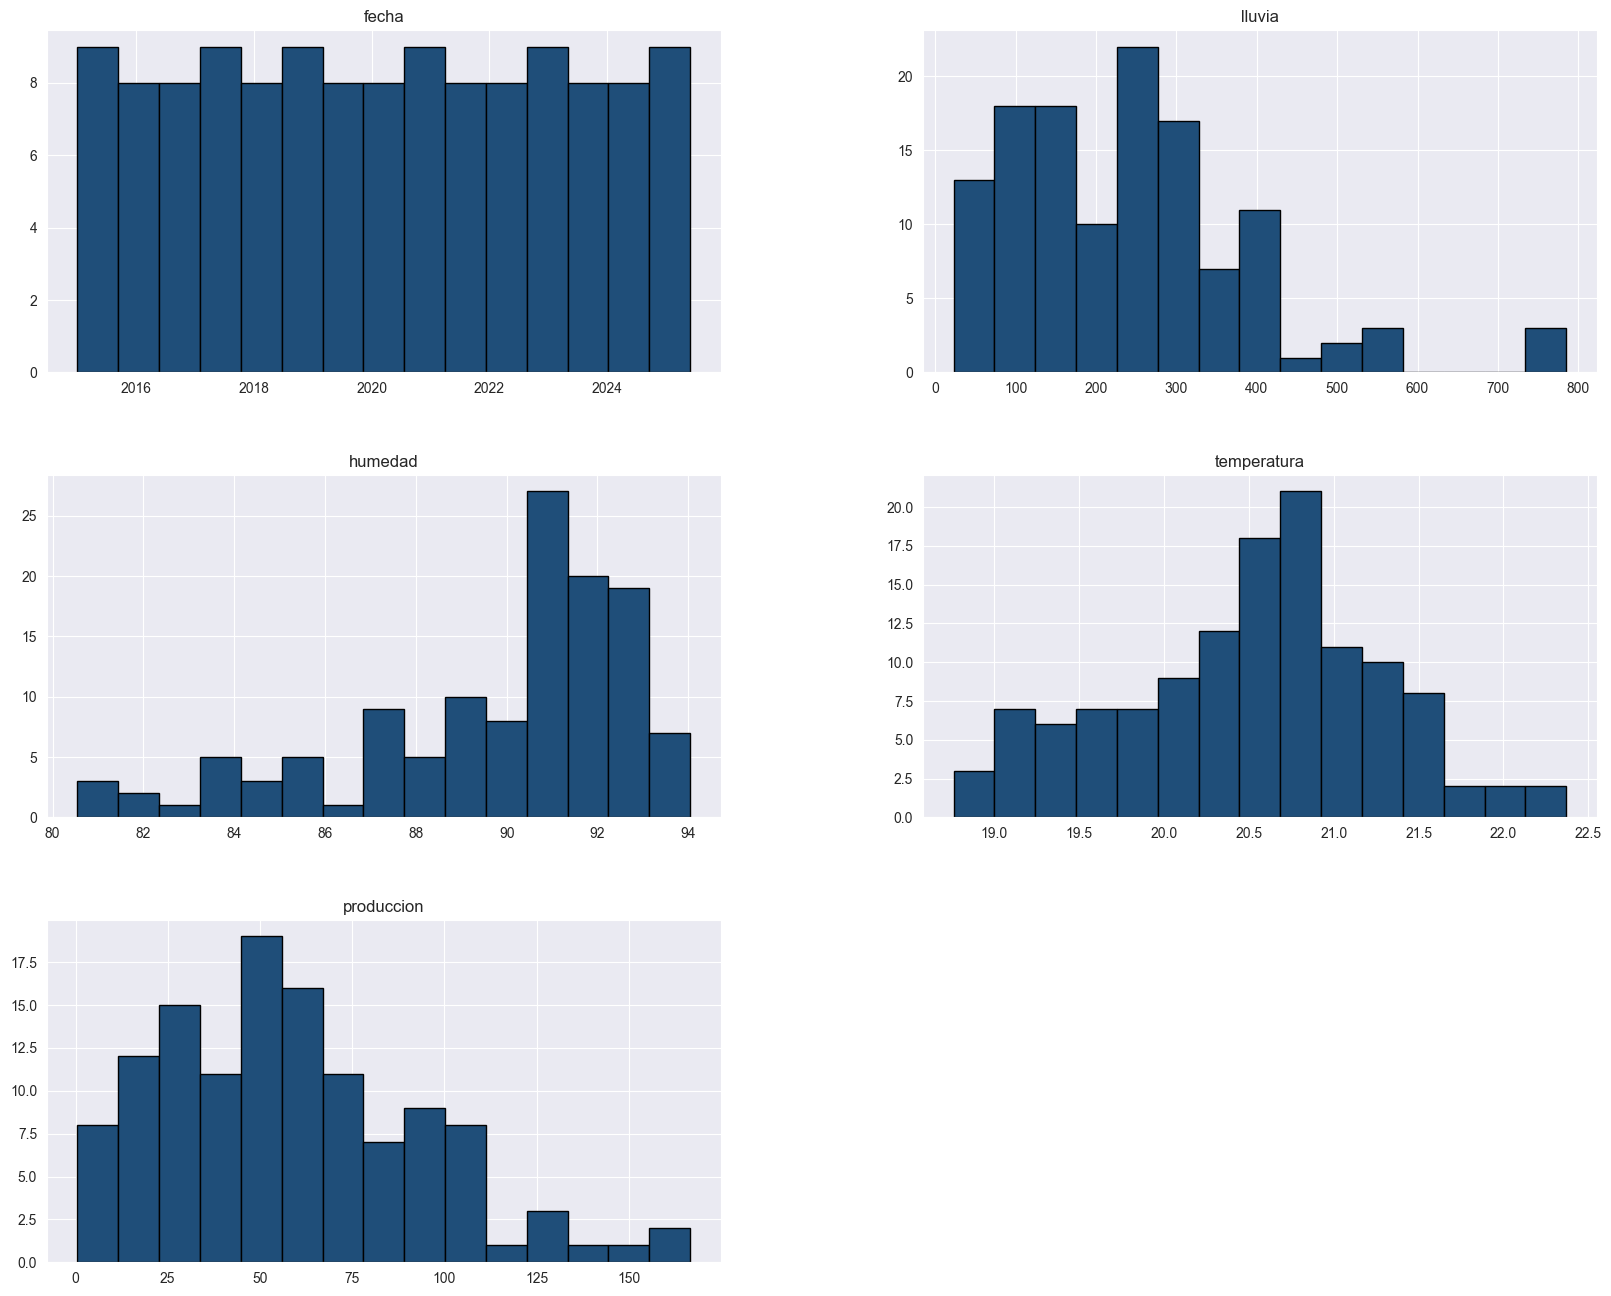

In [29]:
eda_rnn.df.hist(bins=15, figsize=(20, 16), color='#1F4E79', edgecolor='black')


In [30]:
eda_rnn.df.describe()

,fecha,lluvia,humedad,temperatura,produccion
count,126,125.000000,125.00000,125.000000,124.00000
mean,2020-03-16 18:28:34.285714176,240.219840,89.73280,20.526640,58.21429
min,2015-01-01 00:00:00,22.650000,80.55000,18.760000,0.53000
25%,2017-08-08 18:00:00,129.660000,88.15000,19.990000,29.90000
50%,2020-03-16 12:00:00,235.750000,90.84000,20.640000,54.56500
75%,2022-10-24 06:00:00,318.140000,91.87000,21.010000,78.16375
max,2025-06-01 00:00:00,785.070000,94.04000,22.370000,166.63500
std,NaN,150.386592,3.15204,0.764467,35.01202


### BoxPlot para "area" y "produccion"

In [32]:
import plotly.express as px

fig = px.box(eda_rnn.df, y='produccion', title='Boxplot de Producción')
fig.show()

### Gráfico de Densidad

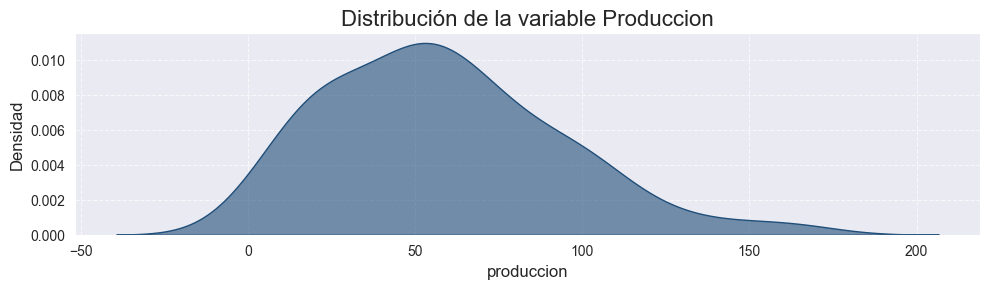

In [33]:
eda_rnn.graficar_densidad('produccion')

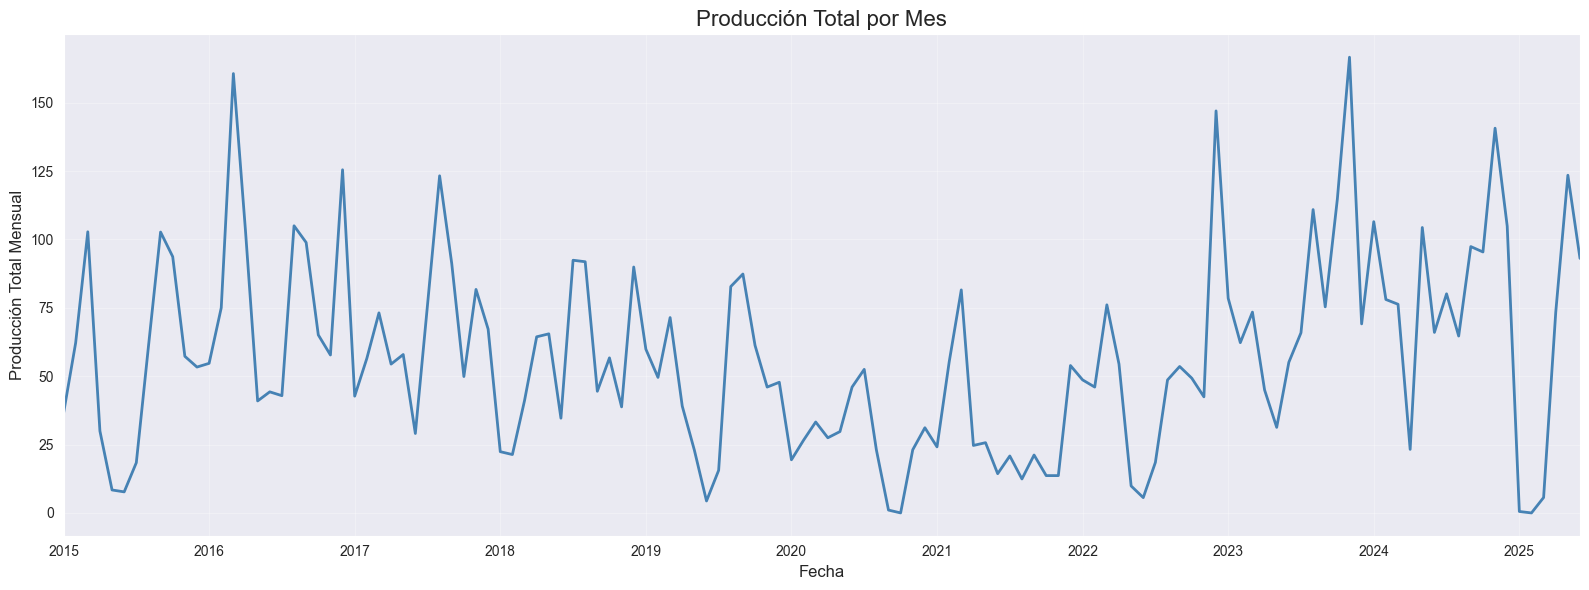

In [35]:
produccion_mensual = eda_rnn.df.set_index('fecha').resample('ME')['produccion'].sum()

plt.figure(figsize=(16, 6))
produccion_mensual.plot(kind='line', color='steelblue', linewidth=2)
plt.title('Producción Total por Mes', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Producción Total Mensual', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [36]:
eda_rnn.df.sort_values(by=['produccion'], ascending=False)

,fecha,lluvia,humedad,temperatura,produccion
1102,2023-11-01,294.26,93.77,21.08,166.635
674,2016-03-01,31.67,81.08,21.29,160.650
1043,2022-12-01,104.96,90.88,19.42,147.000
1162,2024-11-01,779.73,94.04,20.64,140.679
683,2016-12-01,176.91,93.04,19.65,125.475
...,...,...,...,...,...
857,2019-06-01,255.94,91.58,21.52,4.375
920,2020-09-01,266.41,89.58,20.60,1.050
1212,2025-01-01,122.30,91.29,19.89,0.530
921,2020-10-01,419.90,92.39,20.64,NaN


### Rellenar NaN

In [37]:
eda_rnn.df[eda_rnn.df.isnull().any(axis=1)]

,fecha,lluvia,humedad,temperatura,produccion
921,2020-10-01,419.90,92.39,20.64,NaN
1213,2025-02-01,57.69,88.61,19.99,NaN
1217,2025-06-01,NaN,NaN,NaN,93.072


In [38]:
print(eda_rnn.df.isnull().sum())

fecha          0
lluvia         1
humedad        1
temperatura    1
produccion     2
dtype: int64


In [39]:
eda_rnn.df.fillna(method='ffill', inplace=True)

C:\Users\pmari\AppData\Local\Temp\ipykernel_19676\2239502998.py:1: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [40]:
print(eda_rnn.df.isnull().sum())

fecha          0
lluvia         0
humedad        0
temperatura    0
produccion     0
dtype: int64


In [41]:
print(eda_rnn.df)

          fecha  lluvia  humedad  temperatura  produccion
612  2015-01-01  171.90    90.67        19.20      36.400
613  2015-02-01  107.62    89.37        19.11      62.200
614  2015-03-01   79.44    86.31        19.49     102.800
615  2015-04-01  115.93    85.46        20.80      29.950
616  2015-05-01  253.66    89.03        20.93       8.400
...         ...     ...      ...          ...         ...
1213 2025-02-01   57.69    88.61        19.99       0.530
1214 2025-03-01   78.32    84.79        20.68       5.640
1215 2025-04-01  342.60    87.64        20.78      73.339
1216 2025-05-01  364.74    92.25        21.60     123.480
1217 2025-06-01  364.74    92.25        21.60      93.072

[126 rows x 5 columns]


In [42]:
print(eda_rnn.df.isnull().sum())

fecha          0
lluvia         0
humedad        0
temperatura    0
produccion     0
dtype: int64


### Combinaciones de cantones y fechas mensuales

In [44]:
print(eda_rnn.df.corr(numeric_only=True)['produccion'].sort_values())


humedad        0.023660
lluvia         0.086058
temperatura    0.119523
produccion     1.000000
Name: produccion, dtype: float64


In [46]:
eda_rnn.df.columns

Index(['fecha', 'lluvia', 'humedad', 'temperatura', 'produccion'], dtype='object')

<Axes: >

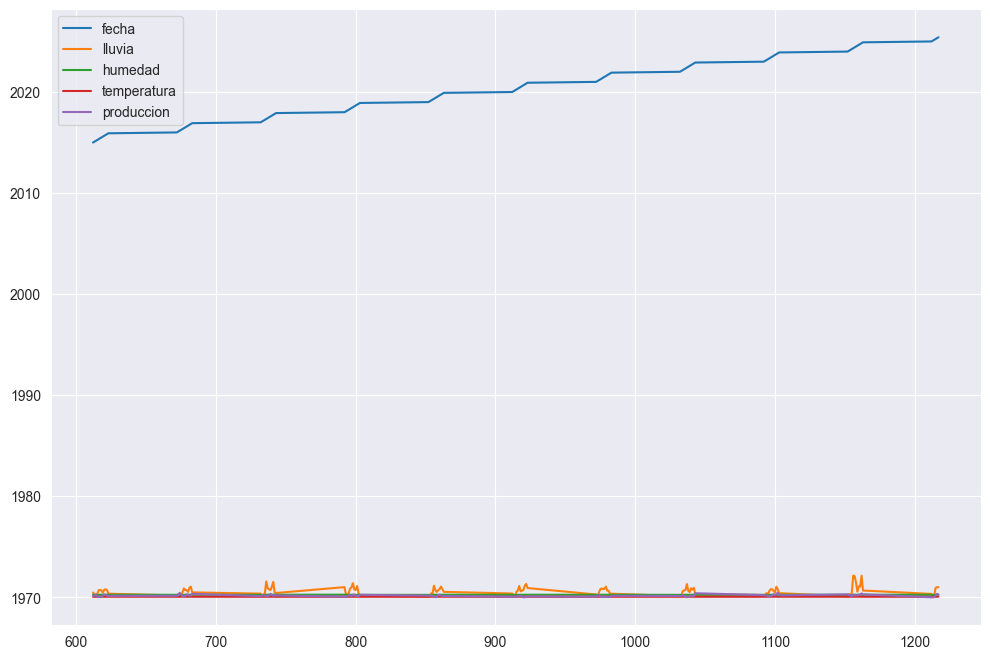

In [47]:
eda_rnn.df.plot(figsize=(12,8))

### Normalización de variables numéricas

In [48]:
columnas_a_normalizar = [col for col in eda_rnn.df.columns
                        if col not in ['fecha', 'canton_id'] and
                        eda_rnn.df[col].dtype in ['int64', 'float64']]

In [49]:
print("Columnas a normalizar:", columnas_a_normalizar)

Columnas a normalizar: ['lluvia', 'humedad', 'temperatura', 'produccion']


In [51]:
eda_rnn.df.head()

,fecha,lluvia,humedad,temperatura,produccion
612,2015-01-01,171.90,90.67,19.20,36.40
613,2015-02-01,107.62,89.37,19.11,62.20
614,2015-03-01,79.44,86.31,19.49,102.80
615,2015-04-01,115.93,85.46,20.80,29.95
616,2015-05-01,253.66,89.03,20.93,8.40


### Guardado de Archivo CSV

In [52]:
file_path = eda_rnn.guardar_csv(
    subcarpetas=["data", "processed", "rnn"],
    nombre_archivo="rnn_produccion.csv"
)
print(f"Archivo guardado en: {file_path}")

Archivo guardado en: C:\Users\pmari\Downloads\Template-AgroIA (3)\Template-AgroIA\data\processed\rnn\rnn_produccion.csv
